In [55]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("../Data/Default.csv")
df.head()

sns.scatterplot

<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

C:\Users\user\AppData\Local\Temp\ipykernel_16296\1799346939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="default", y=column, ax=ax, palette="Set1")
C:\Users\user\AppData\Local\Temp\ipykernel_16296\1799346939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="default", y=column, ax=ax, palette="Set1")


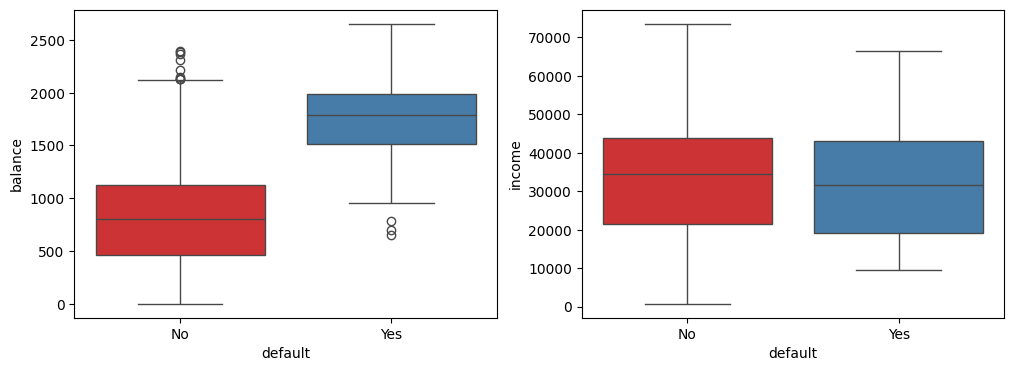

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for ax, column in zip(ax, ["balance", "income"]) :
    sns.boxplot(data=df, x="default", y=column, ax=ax, palette="Set1")


In [57]:
pd.get_dummies(df, columns=['default', 'student'], dtype=int).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,1,0,1,0
1,817.180407,12106.134700,1,0,0,1
2,1073.549164,31767.138947,1,0,1,0
3,529.250605,35704.493935,1,0,1,0
4,785.655883,38463.495879,1,0,1,0


In [58]:
df = pd.get_dummies(df, columns=['default', 'student'], dtype=int, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [59]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, Y = df.drop('default_Yes', axis='columns'), df['default_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegressionCV(penalty='l2', cv=10)

model.fit(scaled_X_train, Y_train)
model.intercept_, model.coef_

(array([-6.19131104]), array([[ 2.79774904,  0.0631535 , -0.22822624]]))

In [60]:
Y_hat = model.predict(scaled_X_test)
print(Y_hat)

[0 0 0 ... 0 0 0]


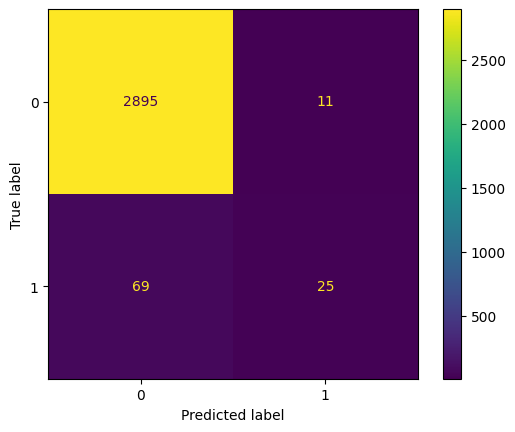

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_hat)
display = ConfusionMatrixDisplay(cm)

display.plot()

In [62]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.69      0.27      0.38        94

    accuracy                           0.97      3000
   macro avg       0.84      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000

